[View in Colaboratory](https://colab.research.google.com/github/agerk/dataScience/blob/master/data_analysis_and_model_dev_with_python.ipynb)

<h2>Model Development</h2>

Objective: predic price of car

In [0]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load data
path = 'https://ibm.box.com/shared/static/q6iiqb1pd7wo8r3q28jvgsrprzezjqk3.csv'
df = pd.read_csv(path)
df.head()

,Unnamed: 0,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,3,2,164,audi,std,four,sedan,fwd,front,99.8,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,4,2,164,audi,std,four,sedan,4wd,front,99.4,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


<h3>Linear Regression and Multiple Linear Regression</h3>

- Simple linear regression: explain the relationship between predictor/dependent variables
- Question: How could highway-mpg help us predict cat price?

In [0]:
# Load linear regression module 
from sklearn.linear_model import LinearRegression

In [6]:
# Create simple linear regression object
lm = LinearRegression()
X = df[['highway-mpg']]
y = df['price']

# Fit the linear model using highway-mpg
lm.fit(X, y)

# Outout prediction to yhat
yhat = lm.predict(X)
# Predict price for range of highway-mpg [0:5]
print("predicted values: ", yhat[0:5])

predicted values:  [16236.50464347 16236.50464347 17058.23802179 13771.3045085
 20345.17153508]


In [15]:
# Intercept
print("Intercept: ", lm.intercept_)
# Slopp
print("Splope: ", lm.coef_)
# Estimated linear model
print("yhat = {} {} x highway-mpg".format(lm.intercept_,lm.coef_[0]))

Intercept:  38423.3058581574
Splope:  [-821.73337832]
yhat = 38423.3058581574 -821.7333783219254 x highway-mpg


**Multiple Linear Regression** 

- predicting car price using multiple predictors

In [28]:
# use the following predictors and build multiple linear regression model
z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
# Fit linear model
lm.fit(z, df['price'])
print("Intercept: ", lm.intercept_)
# Slopp
print("Splope: ", lm.coef_)
print("yhat_multipleRef = {} + {} x horsepower + {} x curb-weight + {} x engine-size + {} x highway-mpg" \
      .format(lm.intercept_,lm.coef_[0],lm.coef_[1],lm.coef_[2],lm.coef_[3]))

Intercept:  -15806.62462632922
Splope:  [53.49574423  4.70770099 81.53026382 36.05748882]
yhat_multipleRef = -15806.62462632922 + 53.49574422604914 x horsepower + 4.707700994613939 x curb-weight + 81.53026382122758 x engine-size + 36.05748881648596 x highway-mpg


<h3>Model Evaluation </h3>

We use the following techinques to evaluate simple linear regression models
- Regression plot: shows strength of correlation and its direction (+ve or -ve)
- Residula plot: help to visualize the variance of the data

**Regplot**

In [0]:
import seaborn as sns
%matplotlib inline

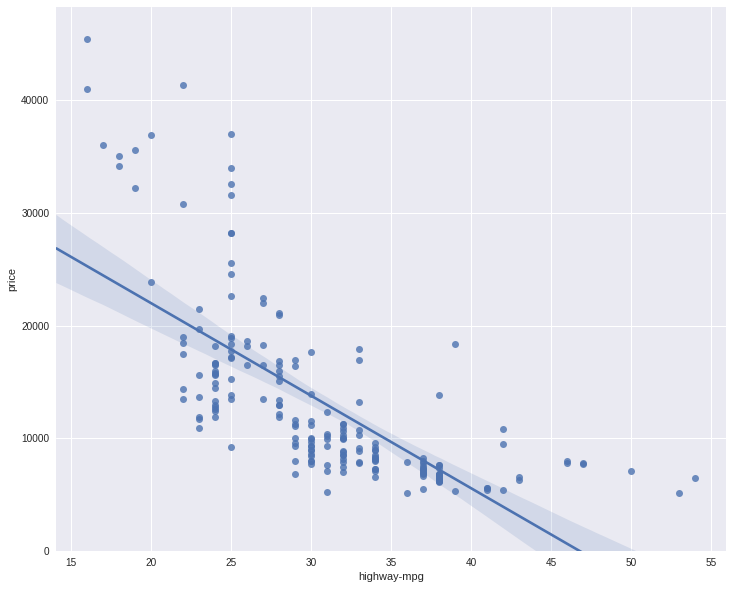

In [32]:
# Visualize Horsepower as a potential predictor variable for price
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)
plt.show()

Observation: price is negatively correlated to highway-mpg, since the regression slope is negative.


(0, 47424.38921869223)

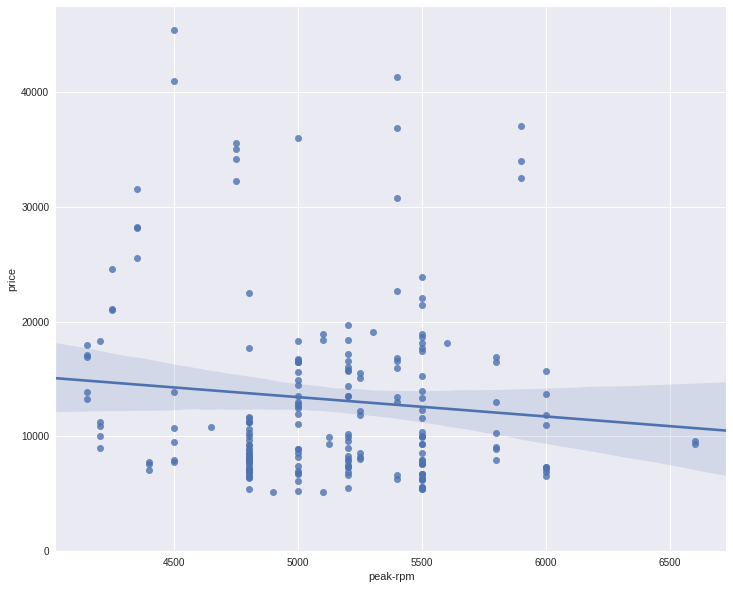

In [33]:
# Compare the above plot with "peak-rpm"
plt.figure(figsize=(width, height))
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)

Comparing the regplot of "highway-mpg" and "peak-rpm", data point for highway-mpg  are clustered around the generated line and on the average. The data points for "peak-rpm" doesn't show stron pattern

In [34]:
# Check the correlation coefficient of the two variables
df[["highway-mpg", "peak-rpm", "price"]].corr()

,highway-mpg,peak-rpm,price
highway-mpg,1.000000,-0.058598,-0.704692
peak-rpm,-0.058598,1.000000,-0.101616
price,-0.704692,-0.101616,1.000000


**Residual Plot**

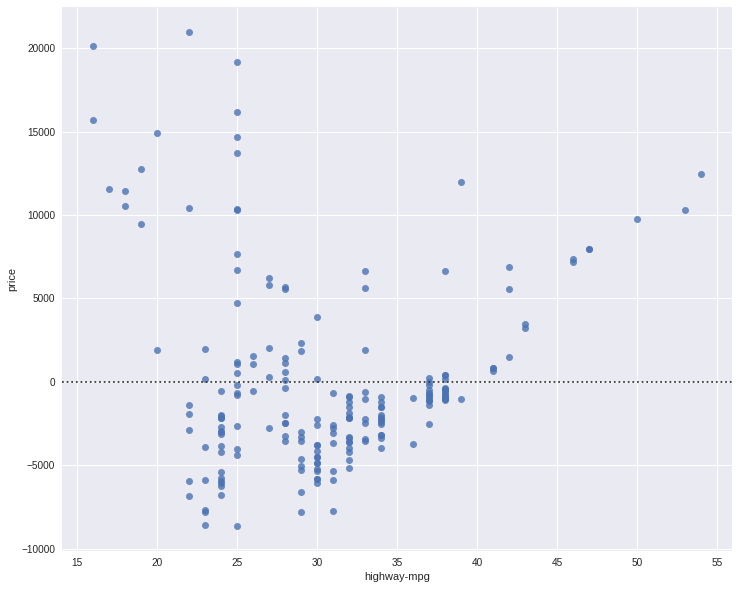

In [35]:
# Create residual plot for "highway-mpg" and "price"
plt.figure(figsize=(width, height))
sns.residplot(df["highway-mpg"], df["price"])
plt.show()

Observation: the residual plot shows that the residuals are not spread around x-axis, maybe a non-linear model is more appropriate for this data

**Multiple linear regression**

- distribution plots are used to visualize multiple linear regression 

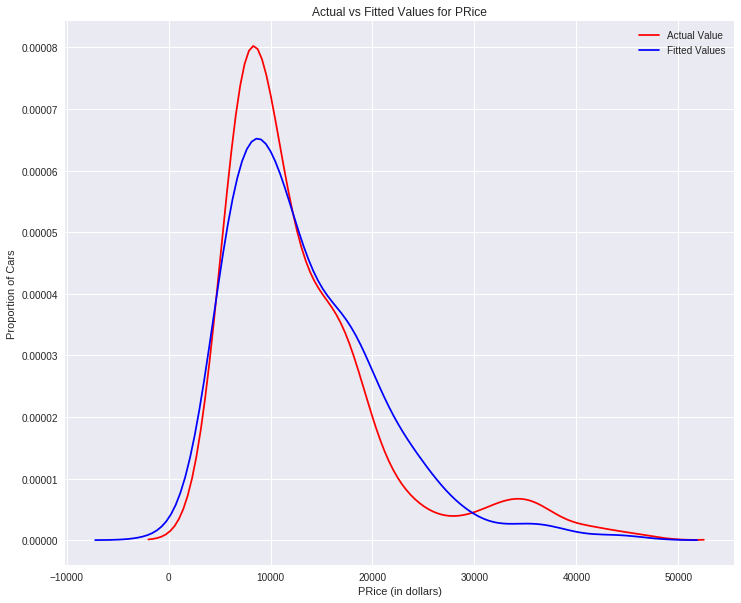

In [36]:
# Make muliple linear regression prediction
y_hat = lm.predict(z)

# Create plot
plt.figure(figsize=(width, height))
# Plot actual price data
ax1 = sns.distplot(df["price"], hist=False, color="r", label="Actual Value")
# add predicted price on top of actual price plot
sns.distplot(y_hat, hist=False, color="b", label="Fitted Values", ax=ax1)

plt.title('Actual vs Fitted Values for PRice')
plt.xlabel("PRice (in dollars)")
plt.ylabel("Proportion of Cars")

plt.show()
plt.close()

<h2>Polynomial Regression and Pipelines</h2>

- Its a oarticular case of the general linear regression model.

In [43]:
# Fit polynomial model for "highway-mpg"

def plotPolly(model, independent_var, dependent_var, name):
  x_new = np.linspace(15, 55, 100)
  y_new = model(x_new)
  
  # Create plot
  plt.plot(independent_var, dependent_var, '.', x_new, y_new, '-')
  plt.title('Polynomial fit for Price-Length')
  ax = plt.gca()
  ax.set_axis_bgcolor((0.898, 0.898, 0.898))
  fig = plt.gcf()
  plt.xlabel(name)
  plt.ylabel('Price of Cars')
  
  plt.show()
  plt.close()
print("done!")


done!


In [39]:
# Predict price using highway-mpg 
x = df["highway-mpg"]
y = df['price']
print('done!')

# Fit using 3rd order polynomial
f = np.polyfit(x, y, 3)
p = np.poly1d(f)    # get the function 
print(p)

done!
        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.
  # Remove the CWD from sys.path while we load stuff.


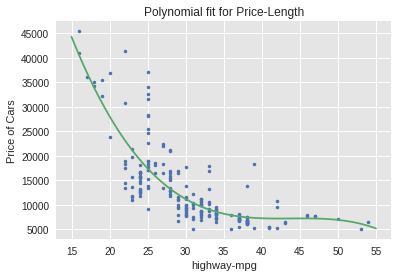

In [44]:
# Plot the function
plotPolly(p, x, y, 'highway-mpg')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.
  # Remove the CWD from sys.path while we load stuff.


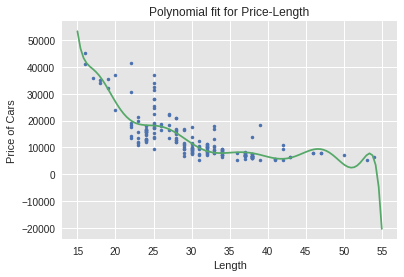

In [45]:
# Try 11th order polynomial
f1 = np.polyfit(x, y, 11)
p1 = np.poly1d(f1)
plotPolly(p1, x, y, 'Length')

Polynomial transformation on multiple features

In [55]:
# import module
from sklearn.preprocessing import PolynomialFeatures
pr = PolynomialFeatures(degree=2)    # generate a new feature matrix from combination of features
pr

PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)

In [56]:
# Transform data
z_pr = pr.fit_transform(z)
print("The original data has {} features, after transformation it has {}". format(z.shape, z_pr.shape))

The original data has (201, 4) features, after transformation it has (201, 15)


<h3>Pipeline</h3>
- it simplify data preprocessing

In [0]:
# Load liberaries
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [71]:
# Create a pipeline by using list of tuples
# normalize data -> perform transformation -> fit model 
_input = [('scale', StandardScaler()), ('polynomial', PolynomialFeatures()), ('model', LinearRegression())]
pipe = Pipeline(_input)    # instantiate pipeline
pipe

Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('polynomial', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('model', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

In [72]:
# fit model
pipe.fit(z, y)
# make prediction
y_pipe = pipe.predict(z)
y_pipe[0:4]

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555])

<h3>Measure for In-sample Evaluation </h3>

- quantitative measure to determine model accuracy
- two meausres used for accuracy are
  - R-squared: coefficient of determination. It measures how close the data is to the fitted regression line. 
  - Mean Squared Error(MSE): measures average of the squares of errors

In [96]:
# Simple linear regression
X = df[["horsepower"]] 
# Y = df[['price']]
lm.fit(X, y)
z2 = lm.score(X, y)
print("We can see that {}% of the variation of priceis explained by the simple \
linear model horsepower_fit".format(100*z2))    # find R-squared

We can see that 65.54109795391571% of the variation of priceis explained by the simple linear model horsepower_fit


In [97]:
from sklearn.metrics import mean_squared_error
# Calculate MSE
y_hat = lm.predict(X)
y_hat[0:4]
# get MSE
mean_squared_error(df['price'], y_hat)


21654544.398254286

**Multiple linear regression**

In [100]:
# calculate R-squared
lm.fit(z, df['price'])
z2_mlr = lm.score(z, df['price'])
print("We can see that {}% of the variation of priceis explained by the simple \
linear model horsepower_fit".format(100*z2_mlr))    # find R-squared

We can see that 80.93562806577457% of the variation of priceis explained by the simple linear model horsepower_fit


In [101]:
# Calculate MSE
y_pred_mlr = lm.predict(z)
mean_squared_error(y_pred_mlr, df['price'])

11980366.87072649

<h2>Prediction and Decision Making</h2>

in general, 
- Model with high **R-squared** value is a better fit for the data
- Model with smallest **MSE** value is a better fir



In [112]:
# create new input
new_input = np.arange(1, 100, 1).reshape(-1, 1)
# fit model
lm.fit(X, y)
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [113]:
# make prediction
y_hat2 = lm.predict(new_input)
y_hat2[0:5]

array([-4425.37517598, -4253.19205407, -4081.00893215, -3908.82581024,
       -3736.64268833])

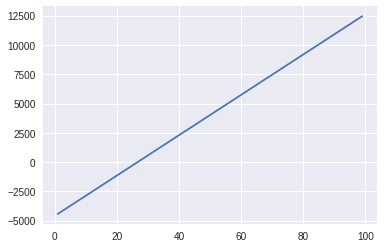

In [114]:
# make plot
plt.plot(new_input, y_hat2)
plt.show()

*This notebook is inspired by IBM Applied Data Science course on Coursera*